In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
## 讀取檔案
training_data = pd.read_csv('adult.data',sep=", ",header=None,engine='python')
test_data = pd.read_csv('adult.test',sep=", ",header=None,engine='python',skiprows=1)
training_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
test_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [4]:
## 原始資料長度
print(f'training_data：{len(training_data)} records')
print(f'test_data：{len(test_data)} records')

training_data：32561 records
test_data：16281 records


In [5]:
## 命名欄位
training_data.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','label']
test_data.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','label']
feature_cols = ['age','workclass','fnlwgt','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country']
training_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
test_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [7]:
for column in training_data.columns:
    print(training_data[column].value_counts())
    
## education跟education-num數量一樣所以取education-num即可，故刪除education
training_data = training_data.drop(columns=['education'])
test_data = test_data.drop(columns=['education'])

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
9     10501
10     7291

In [8]:
# label=y，other=X
# label = df['label']
# for i in range(len(label)):
#     if (label[i] == '<=50K'):
#         label[i] = 0
#     elif (label[i]=='>50K'):
#         label[i] = 1
# df['label'] = label
# df
convert = {"label" :{"<=50K":0, ">50K":1}}
training_data = training_data.replace(convert)
convert = {"label" :{"<=50K.":0, ">50K.":1}}
test_data = test_data.replace(convert)
training_data

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [9]:
test_data

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
16277,64,?,321403,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,0
16278,38,Private,374983,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
16279,44,Private,83891,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [10]:
# 缺失值數量
print("=======training_data=======")
for col,cnt in zip(training_data.columns,(training_data=='?').sum(axis = 0)):
    if cnt > 0:
        print(str(col) + ': ' + str(cnt) + ' records has missing value')
        

print("=======test_data=======")
for col,cnt in zip(test_data.columns,(test_data=='?').sum(axis = 0)):
    if cnt > 0:
        print(str(col) + ': ' + str(cnt) + ' records has missing value')

=======training_data=======
workclass: 1836 records has missing value
occupation: 1843 records has missing value
native-country: 583 records has missing value
=======test_data=======
workclass: 963 records has missing value
occupation: 966 records has missing value
native-country: 274 records has missing value


In [11]:
training_data = training_data[training_data['workclass']!='?']       
training_data = training_data[training_data['occupation']!='?']      
training_data = training_data[training_data['native-country']!='?']   

test_data = test_data[test_data['workclass']!='?']       
test_data = test_data[test_data['occupation']!='?']      
test_data = test_data[test_data['native-country']!='?']   

## 刪除缺失值後資料長度
print(f'training_data：{len(training_data)} records')
print(f'test_data：{len(test_data)} records')

training_data：30162 records
test_data：15060 records


In [12]:
# 確認無缺失值
print("=======training_data=======")
for col,cnt in zip(training_data.columns,(training_data=='?').sum(axis = 1)):
    if cnt == 0:
        print(str(col) + ': ' + str(cnt) + ' records')
        
        
print("=======test_data=======")    
for col,cnt in zip(test_data.columns,(test_data=='?').sum(axis = 1)):
    if cnt == 0:
        print(str(col) + ': ' + str(cnt) + ' records')

=======training_data=======
age: 0 records
workclass: 0 records
fnlwgt: 0 records
education-num: 0 records
marital-status: 0 records
occupation: 0 records
relationship: 0 records
race: 0 records
sex: 0 records
capital-gain: 0 records
capital-loss: 0 records
hours-per-week: 0 records
native-country: 0 records
label: 0 records
=======test_data=======
age: 0 records
workclass: 0 records
fnlwgt: 0 records
education-num: 0 records
marital-status: 0 records
occupation: 0 records
relationship: 0 records
race: 0 records
sex: 0 records
capital-gain: 0 records
capital-loss: 0 records
hours-per-week: 0 records
native-country: 0 records
label: 0 records


In [13]:
training_data = pd.get_dummies(training_data)
test_data = pd.get_dummies(test_data)
feature_cols = training_data.columns
# print(*feature_cols,sep='\n')
training_data['label'] = training_data['label'].astype('int64')
test_data['label'] = test_data['label'].astype('int64')
for column in training_data.columns:
    if column not in test_data.columns:
        test_data[column] = 0
        print(training_data[column])
        print(test_data[column])
        break
print(training_data.info())
print(test_data.info())

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    0
32559    0
32560    0
Name: native-country_Holand-Netherlands, Length: 30162, dtype: uint8
0        0
1        0
2        0
3        0
5        0
        ..
16275    0
16276    0
16278    0
16279    0
16280    0
Name: native-country_Holand-Netherlands, Length: 15060, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 89 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   age                                        30162 non-null  int64
 1   fnlwgt                                     30162 non-null  int64
 2   education-num                              30162 non-null  int64
 3   capital-gain                               30162 non-null  int64
 4   capital-loss                               30162 non-null  int64
 5   hours-per-week  

In [14]:
X = training_data.drop('label',axis=1)
y = training_data['label']
# print(Xt.columns)
Xt = test_data.drop('label',axis=1)
Xt.columns = X.columns
yt = test_data['label']
print(X)
print(y)

       age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0       39   77516             13          2174             0              40   
1       50   83311             13             0             0              13   
2       38  215646              9             0             0              40   
3       53  234721              7             0             0              40   
4       28  338409             13             0             0              40   
...    ...     ...            ...           ...           ...             ...   
32556   27  257302             12             0             0              38   
32557   40  154374              9             0             0              40   
32558   58  151910              9             0             0              40   
32559   22  201490              9             0             0              20   
32560   52  287927              9         15024             0              40   

       workclass_Federal-go

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test
# xx_train,xx_test,yy_train,yy_test = train_test_split(Xt,yt,test_size=0.2)

In [16]:
# from sklearn.tree import DecisionTreeClassifier
# # dt = DecisionTreeClassifier()
# dt = DecisionTreeClassifier(criterion='entropy',max_depth=19, max_leaf_nodes = 92)
# dt.fit(X_train,y_train)
# dt.score(X_test,y_test)

In [17]:
# from sklearn.tree import DecisionTreeClassifier
# dt = DecisionTreeClassifier()
# dt = DecisionTreeClassifier(criterion='entropy',max_depth=19, max_leaf_nodes = 92)
# dt.fit(Xt,yt)
# dt.score(Xt,yt)
# # X_test.info()

[0.7548483341621084, 0.8242996850654732, 0.837228576164429, 0.8370628211503398, 0.8398806563898558, 0.8451848168407095, 0.8461793469252444, 0.8478368970661363, 0.8481684070943146, 0.8488314271506713, 0.8476711420520471, 0.8498259572352064, 0.8509862423338306, 0.8519807724183657, 0.8519807724183657, 0.8518150174042765, 0.8513177523620089, 0.8513177523620089]
[0.7543160690571049, 0.8246347941567065, 0.8392430278884462, 0.8395086321381142, 0.8409030544488711, 0.848804780876494, 0.850996015936255, 0.852124833997344, 0.852390438247012, 0.8515272244355909, 0.852589641434263, 0.8519920318725099, 0.8541168658698539, 0.8543160690571049, 0.8543160690571049, 0.8539176626826029, 0.854050464807437, 0.854050464807437]


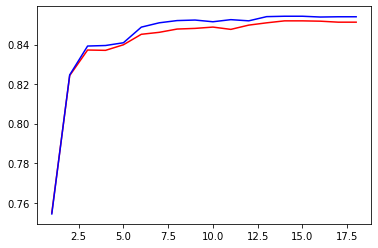

In [25]:
import numpy as np
import matplotlib.pyplot as plt

ax = []
a_train = []
a_test = []
for depth in range(1,19):
    ax.append(depth)
    dt = DecisionTreeClassifier(criterion='entropy',max_depth=depth, max_leaf_nodes = 92)
    dt.fit(X_train,y_train)
    a_train.append(dt.score(X_test,y_test))
#     dt.fit(Xt,yt)
    a_test.append(dt.score(Xt,yt))
    
print(a_train)
plt.plot(ax, a_train, 'r')
print(a_test)
plt.plot(ax, a_test, 'b')
plt.show()

In [26]:
print("=======training_data=======")
train_best = max(a_train)
for i in range(len(a_train)):
    if a_train[i]==train_best:
        print(f' depth : {i} , acc : {train_best:.3f}')
        break
        
print("=======test_data=======")
test_best = max(a_test)
for i in range(len(a_train)):
    if a_test[i]==test_best:
        print(f' depth : {i} , acc : {test_best:.3f}')
        break

=======training_data=======
 depth : 13 , acc : 0.852
=======test_data=======
 depth : 13 , acc : 0.854


[0.7548483341621084, 0.8131940991214984, 0.8242996850654732, 0.837228576164429, 0.837228576164429, 0.837228576164429, 0.837228576164429, 0.837228576164429, 0.837228576164429, 0.837228576164429, 0.837228576164429, 0.8410409414884801, 0.8422012265871043, 0.8422012265871043, 0.8422012265871043, 0.8422012265871043, 0.8448533068125311, 0.8448533068125311, 0.8448533068125311, 0.8448533068125311, 0.8451848168407095, 0.8451848168407095, 0.845682081882977, 0.845682081882977, 0.845682081882977, 0.845682081882977, 0.845682081882977, 0.845682081882977, 0.845682081882977, 0.845682081882977, 0.8458478368970661, 0.8458478368970661, 0.8458478368970661, 0.8458478368970661, 0.8465108569534229, 0.8465108569534229, 0.8443560417702636, 0.8443560417702636, 0.8448533068125311, 0.8448533068125311, 0.8446875517984419, 0.8446875517984419, 0.8446875517984419, 0.8451848168407095, 0.8451848168407095, 0.8450190618266202, 0.8450190618266202, 0.8453505718547986, 0.8453505718547986, 0.8450190618266202, 0.8450190618266

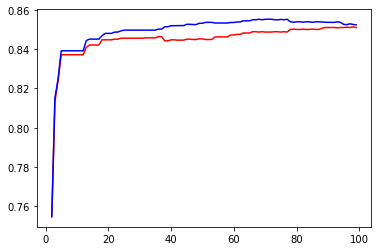

In [28]:
import numpy as np
import matplotlib.pyplot as plt

ax = []
a_train = []
a_test = []
for node in range(2,100):
    ax.append(node)
    dt = DecisionTreeClassifier(criterion='entropy',max_depth=13, max_leaf_nodes = node)
    dt.fit(X_train,y_train)
    a_train.append(dt.score(X_test,y_test))
#     dt.fit(Xt,yt)
    a_test.append(dt.score(Xt,yt))
    
print(a_train)
plt.plot(ax, a_train, 'r')
print(a_test)
plt.plot(ax, a_test, 'b')
plt.show()

In [29]:
mas = max(a_test)
for i in range(len(a_test)):
    if a_test[i]==mas:
        print(i+1)

67
69
70
71
76


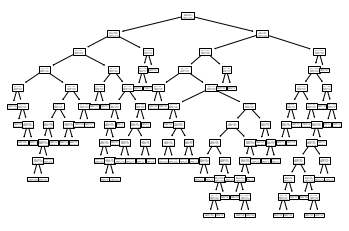

In [32]:
import matplotlib.pyplot as plt
from sklearn import tree
dt = DecisionTreeClassifier(criterion='entropy',max_depth=11, max_leaf_nodes = 67)
dt.fit(X_train,y_train)
tree.plot_tree(dt)
plt.show()

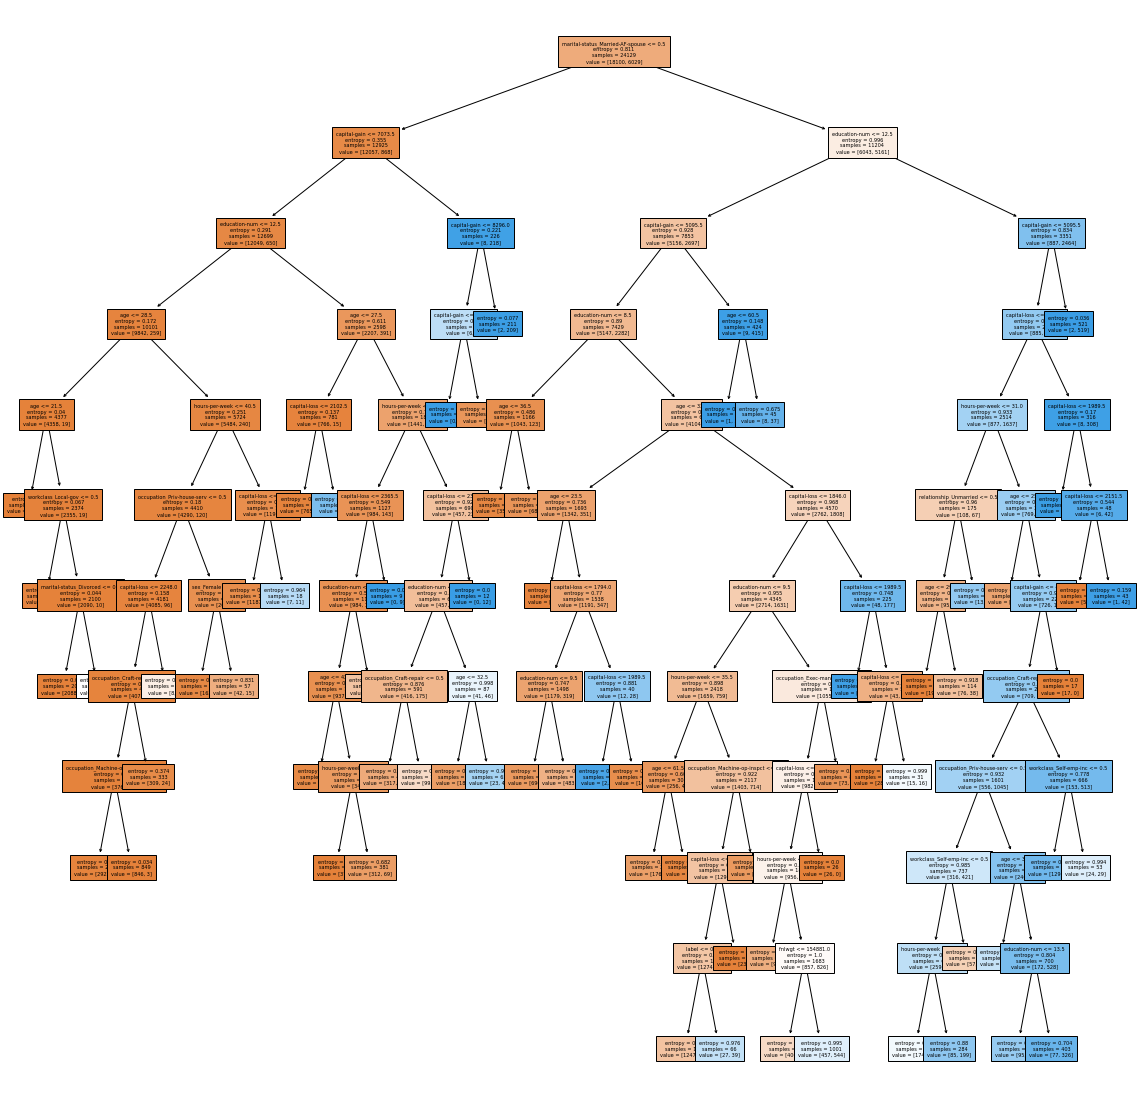

In [33]:
fig = plt.figure(figsize=(20,20))
# _ = tree.plot_tree(dt,filled=True)
_ = tree.plot_tree(dt, feature_names = feature_cols, fontsize = 5, filled = True)